In [51]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import librosa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump, load
from pathlib import Path
import pandas as pd

# clapping - 22
# door knock - 30
# car horn - 43
# glass breaking -  39
# clock alarm - 37

In [ ]:
project_path = Path('audio/five_class')

In [ ]:
#Glass Breaking
ipd.Audio(project_path / '3-203373-A-39.wav') 

In [ ]:
#Door Knock
ipd.Audio(project_path / '3-180147-A-30.wav') 

In [ ]:
#Clapping
ipd.Audio(project_path / '3-181278-A-22.wav') 

In [ ]:
#Clock Alarm
ipd.Audio(project_path / '3-131943-A-37.wav') 

In [ ]:
#Car Horn
ipd.Audio(project_path / '2-138465-A-43.wav') 

In [46]:
project_path = Path('audio/five_class')

def extract_mfccs(file:Path):
    audio, sample_rate = librosa.load(file) 

    #extract mfccs
    mfccs_features = librosa.feature.mfcc(y=audio, n_mfcc=13, sr=sample_rate)
    
    #get average along the time axis
    mfccs_scaled_features = np.mean(mfccs_features,axis=1)
    # mfccs_scaled_features = mfccs_features.flatten('F')
    return mfccs_scaled_features


In [56]:
combined_mfccs = []
labels = []
temp_label = 0

for filename in os.listdir(project_path):

    #extract label from filename. Example filename is '1-104089-A-22.wav' where 22 is label
    label_type = int(filename.split('-')[3][:2])

    #clapping
    if (label_type == 22):
        temp_label = 0
    #door knock
    elif (label_type == 30):
        temp_label = 1
    #car horn
    elif (label_type == 43):
        temp_label = 2
    #glass breaking 
    elif (label_type == 39):
        temp_label = 3
    #clock alarm
    elif (label_type == 37):
        temp_label = 4
    else:
        raise Exception("Unrecognized label")
    
    coeffs = extract_mfccs(project_path / filename )
    combined_mfccs.append(coeffs)
    labels.append(temp_label)

In [57]:
print(f'Clapping labels: {labels.count(0)}')
print(f'Door Knock labels: {labels.count(1)}')
print(f'Car Horn labels: {labels.count(2)}')
print(f'Glass Breaking labels: {labels.count(3)}')
print(f'Clock Alarm labels: {labels.count(4)}')

Clapping labels: 40
Door Knock labels: 40
Car Horn labels: 40
Glass Breaking labels: 40
Clock Alarm labels: 40


In [58]:
combined_mfccs = np.array(combined_mfccs)
labels = np.array(labels)

In [49]:
X_train, X_val, Y_train, Y_val = train_test_split(combined_mfccs,labels,train_size=0.8,test_size=0.2, random_state = 1)#always get the same output

print(X_train.shape)
print(Y_train.shape)

(160, 13)
(160,)


In [64]:
print(X_val.shape)
print(Y_val.shape)

(40, 13)
(40,)


In [52]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
y_pred_val = neigh.predict(X_val)
accuracy_score(Y_val,y_pred_val)

0.7

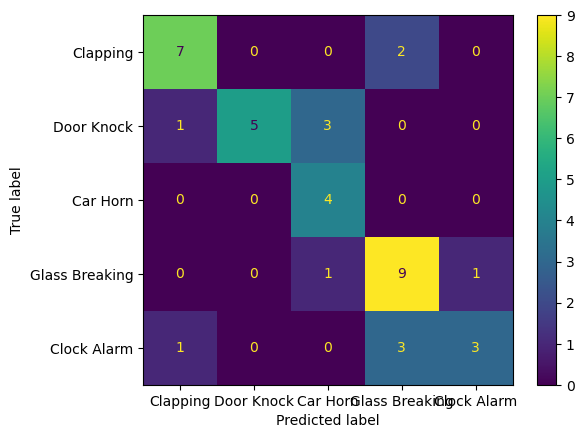

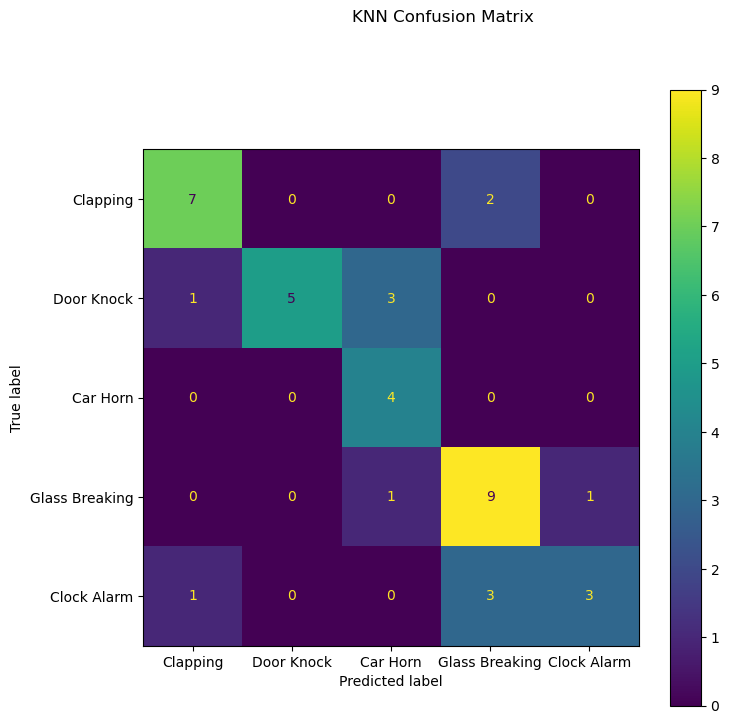

In [65]:
#compute confusion matrix for validation data
from sklearn.metrics import ConfusionMatrixDisplay
alphabet_list = ['Clapping', 'Door Knock', 'Car Horn', 'Glass Breaking', 'Clock Alarm']
cmp = ConfusionMatrixDisplay.from_estimator(neigh,X_val,Y_val,display_labels=alphabet_list)
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('KNN Confusion Matrix')
cmp.plot(ax=ax)

In [53]:
from sklearn.svm import SVC


In [54]:
clf = SVC(kernel='linear').fit(X_train,Y_train)
y_pred_val = clf.predict(X_val)
print(accuracy_score(Y_val,y_pred_val))

0.825


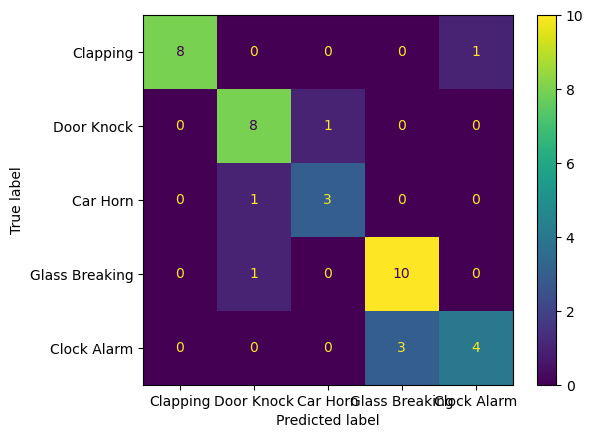

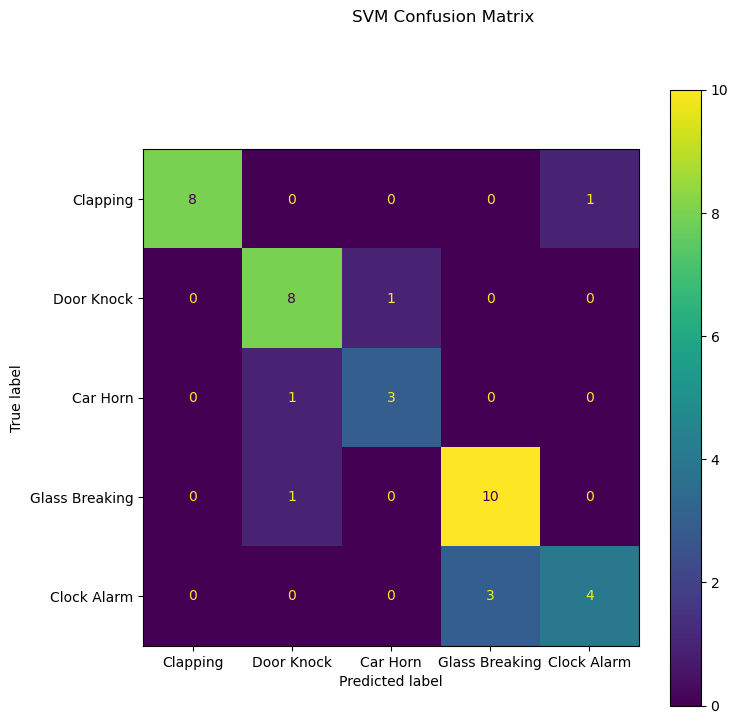

In [66]:
#compute confusion matrix for validation data
from sklearn.metrics import ConfusionMatrixDisplay
alphabet_list = ['Clapping', 'Door Knock', 'Car Horn', 'Glass Breaking', 'Clock Alarm']
cmp = ConfusionMatrixDisplay.from_estimator(clf,X_val,Y_val,display_labels=alphabet_list)
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('SVM Confusion Matrix')
cmp.plot(ax=ax)